In [15]:
!pip install prophet

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use fivethirtyeight plot style
plt.style.use('fivethirtyeight')


In [17]:
from google.colab import files
uploaded = files.upload()

Saving TATA.csv to TATA (2).csv


In [18]:
# We will be using tatasteel share price data which can be downloaded from YAHOO finance website.
df = pd.read_csv('TATA.csv')
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,12-Jun-2025,EQ,156.00,156.26,151.85,156.41,152.60,152.89,153.46,184.6,122.62,"2,78,46,151","4,27,33,15,865.00","1,65,106"
1,11-Jun-2025,EQ,156.45,157.53,155.31,155.68,156.09,156.41,156.54,184.6,122.62,"1,76,05,668","2,75,59,81,215.78","1,07,872"
2,10-Jun-2025,EQ,158.00,159.30,155.50,157.32,155.65,155.68,156.87,184.6,122.62,"2,27,64,080","3,57,09,61,629.98","1,32,605"
3,09-Jun-2025,EQ,157.69,158.20,156.82,157.49,157.30,157.32,157.52,184.6,122.62,"1,53,15,437","2,41,24,61,355.70","1,27,577"
4,06-Jun-2025,EQ,155.70,157.88,154.25,157.97,157.55,157.49,156.38,184.6,122.62,"2,58,04,151","4,03,52,14,926.14","1,33,400"


In [20]:
# add two columnsin dataframe having values as Date and Adj Close
# Remove any extra spaces in column names
df.columns = df.columns.str.strip()

# Rename and subset relevant columns
df[['ds', 'y']] = df[['Date', 'PREV. CLOSE']]
df = df[['ds', 'y']]

df.head()


,ds,y
0,12-Jun-2025,156.41
1,11-Jun-2025,155.68
2,10-Jun-2025,157.32
3,09-Jun-2025,157.49
4,06-Jun-2025,157.97


In [21]:
# split data frame  into two parts train and test
split_date = "2025-01-01"
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()

In [22]:
# Instantiate prophet
model = fbp.Prophet()
# fit the training data
model.fit(df_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplbxspbpz/t35mqqk6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplbxspbpz/4ehfzoq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2193', 'data', 'file=/tmp/tmplbxspbpz/t35mqqk6.json', 'init=/tmp/tmplbxspbpz/4ehfzoq3.json', 'output', 'file=/tmp/tmplbxspbpz/prophet_model6h8vvul7/prophet_model-20250613083437.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:34:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:34:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
# Ensure 'ds' is datetime in the correct format
df_test['ds'] = pd.to_datetime(df_test['ds'], format='%d-%b-%Y')

# Predict using the model
forecast = model.predict(df_test)

# View the result
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
31,2025-05-26,120.481389,144.189201,163.350184,120.481389,120.481389,32.977919,32.977919,32.977919,32.977919,32.977919,32.977919,0.0,0.0,0.0,153.459308
32,2025-05-27,120.639718,142.975666,161.749425,120.639718,120.639718,31.676483,31.676483,31.676483,31.676483,31.676483,31.676483,0.0,0.0,0.0,152.316200
33,2025-05-28,120.798046,144.285866,161.503825,120.798046,120.798046,32.050295,32.050295,32.050295,32.050295,32.050295,32.050295,0.0,0.0,0.0,152.848341
34,2025-05-29,120.956375,146.244071,164.714448,120.956375,120.956375,34.439779,34.439779,34.439779,34.439779,34.439779,34.439779,0.0,0.0,0.0,155.396154
35,2025-05-30,121.114704,143.482561,162.150990,121.114704,121.114704,31.727554,31.727554,31.727554,31.727554,31.727554,31.727554,0.0,0.0,0.0,152.842257


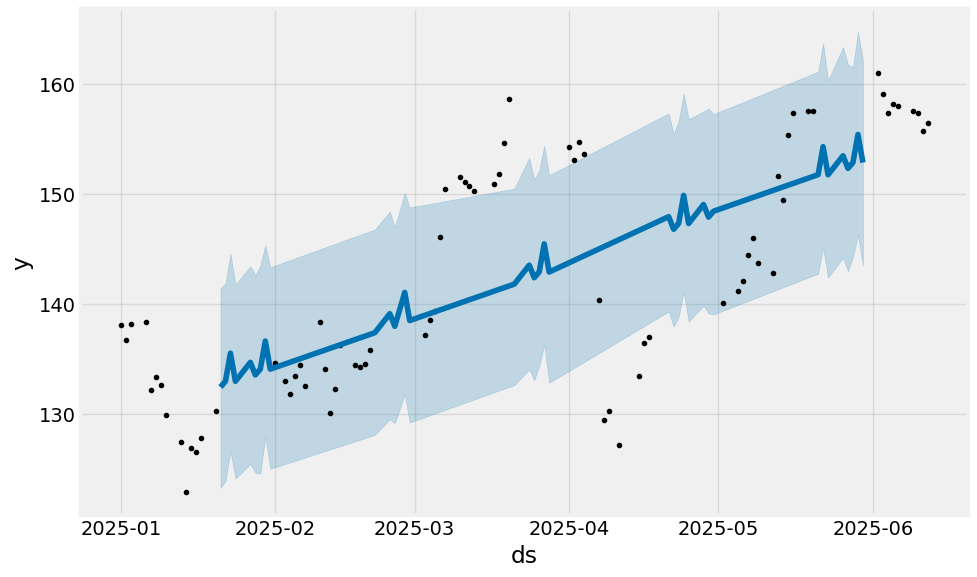

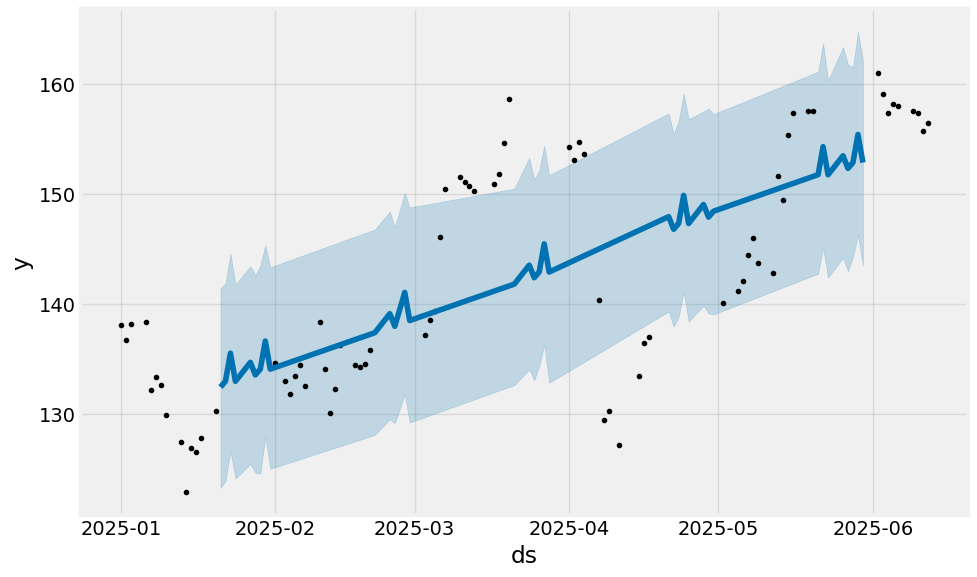

In [25]:
model.plot(forecast)

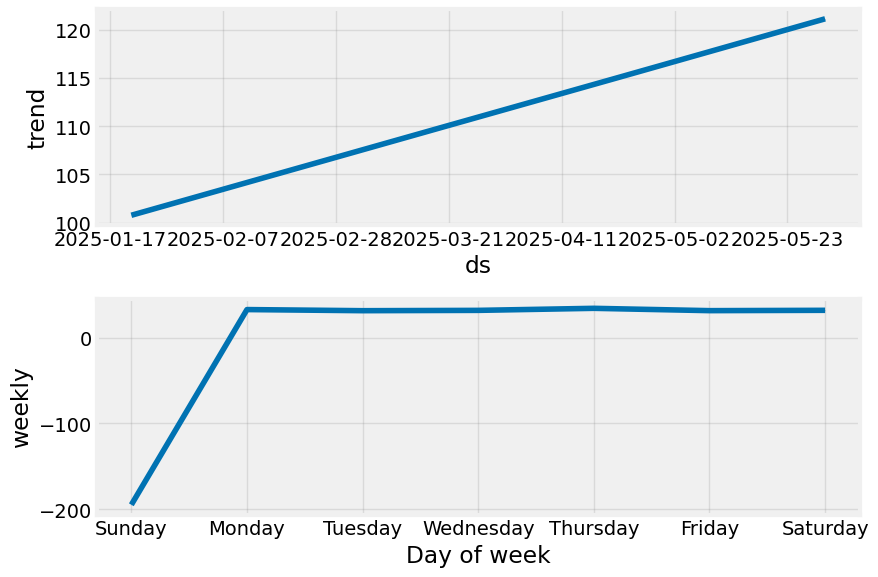

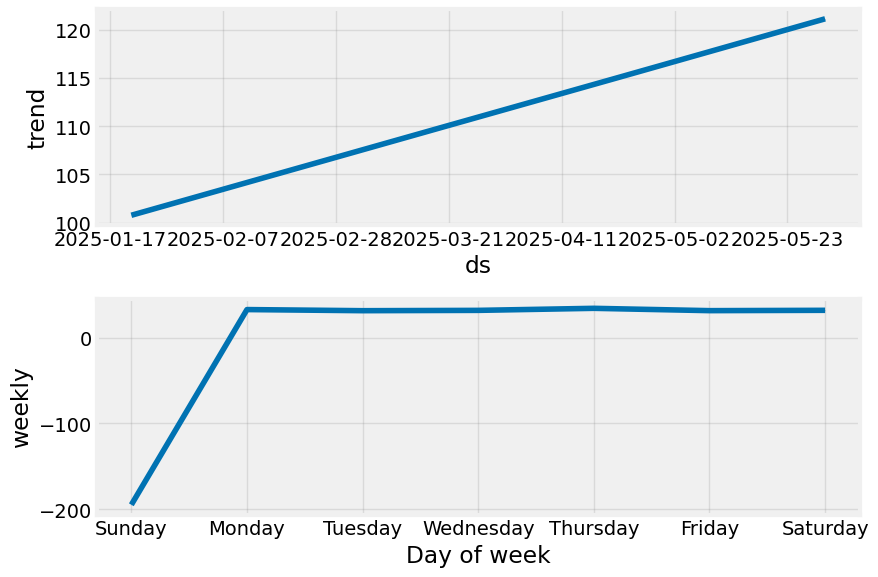

In [26]:
# plot graphs of different components:
model.plot_components(forecast)

In [27]:
# code
print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))

Mean Squared Error (MSE): 346.0650885452424
Mean Absolute Error (MAE): 15.97274935723028


In [28]:
def mean_abs_perc_err(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))

Mean Absolute % Error (MAPE):  11.001365572973306
